In [33]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [34]:
N = 5000

C = np.random.randn(N,1)
A = 0.8 * np.random.randn(N,1)  # backdoor adjustment variable
K = A + 0.1 * np.random.randn(N,1)  # backdoor adjustment variable
X = C - 2*A + 0.2 * np.random.randn(N,1)
F = 3*X + 0.8 * np.random.randn(N,1)
D = -2*X + 0.5 * np.random.randn(N,1)  # mediator between x and y
G = D + 0.5 * np.random.randn(N,1)  # descendent of mediator
Y = 2*K - D + 0.2 * np.random.randn(N,1)
H = 0.5*Y + 0.1 * np.random.randn(N,1)  # effect of Y

In [35]:
def plot_importances(predictors, outcome, feature_names):

    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.4, random_state=42)

    forest = RandomForestRegressor(random_state=0)
    forest.fit(X_train, y_train)
    predictions = forest.predict(X_test)
    importances = forest.feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print('MSE', mean_squared_error(predictions, y_test))

MSE 0.03971076573088968


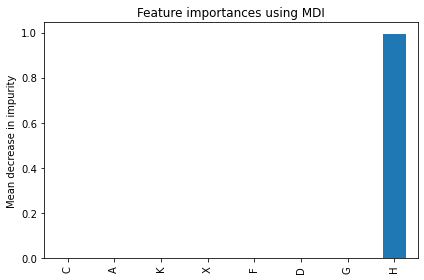

In [36]:
predictors = np.concatenate((C, A, K, X, F, D, G, H),1)
outcome =  Y[:,0]
feature_names = ['C', 'A', 'K', 'X', 'F', 'D', 'G', 'H']

plot_importances(predictors, outcome, feature_names)


MSE 0.09119807493414481


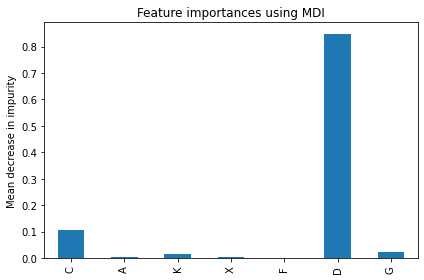

In [37]:

# remove effect of y
predictors = np.concatenate((C, A, K, X, F, D, G),1)
outcome =  Y[:,0]
feature_names = ['C', 'A', 'K', 'X', 'F', 'D', 'G']

plot_importances(predictors, outcome, feature_names)

MSE 0.2331177744662307


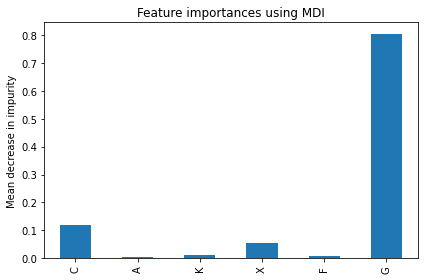

In [38]:

# remove mediator
predictors = np.concatenate((C, A, K, X, F, G),1)
outcome =  Y[:,0]
feature_names = ['C', 'A', 'K', 'X', 'F', 'G']

plot_importances(predictors, outcome, feature_names)

MSE 0.3599118477551282


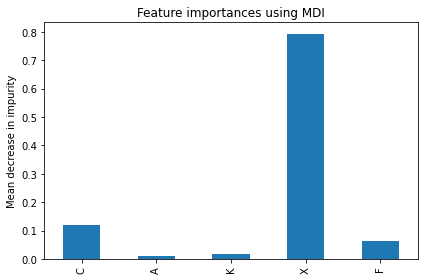

In [39]:

# remove desc of mediator
predictors = np.concatenate((C, A, K, X, F),1)
outcome =  Y[:,0]
feature_names = ['C', 'A', 'K', 'X', 'F']

plot_importances(predictors, outcome, feature_names)